In [148]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import percentileofscore



In [132]:
np.random.seed(2609)
population_1=np.random.normal(loc=10,scale=5,size=1000000)
population_2=np.random.normal(loc=13,scale=5,size=1000000)

In [133]:
sample_size=[1000,100] #[a,b] number of samples = b, number of iterations = a

In [141]:
np.random.seed(2609)
mean_p1=np.empty(sample_size[0])
mean_p2=np.empty(sample_size[0])
diff=np.empty(sample_size[0])
for i in tqdm(range(sample_size[0])):
    mean_p1[i]=np.random.choice(population_1, size=sample_size[1], replace=False).mean()
    mean_p2[i]=np.random.choice(population_2, size=sample_size[1], replace=False).mean()
    diff[i]=(np.random.choice(population_1, size=sample_size[1], replace=False)-np.random.choice(population_2, size=sample_size[1], replace=False)).mean()


100%|██████████| 1000/1000 [01:32<00:00, 10.78it/s]


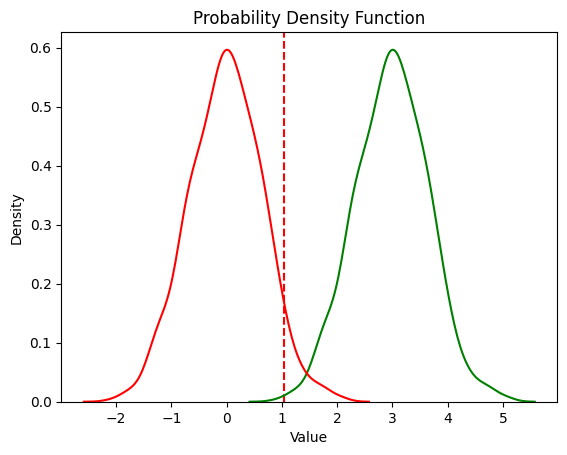

In [146]:
# Calculate the 5 percent alpha (5th percentile)
alpha_5_percent = np.percentile(-diff-3, 95)

# Add a vertical line at the 5 percent alpha level
plt.axvline(alpha_5_percent, color='red', linestyle='--', label='5% alpha level')

#sns.kdeplot(mean_p1)
#sns.kdeplot(mean_p2,color='r')
sns.kdeplot(-diff,color='g')
sns.kdeplot(-diff-3,color='r')


plt.title("Probability Density Function")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [147]:
alpha_5_percent

1.0384099761358705

In [161]:
percentileofscore(-diff, 1.038, kind='rank')

0.1

In [158]:
percentileofscore(-diff-3, 1.038)

94.9

In [ ]:
-diff-3

In [157]:
np.percentile(-diff, 0.0585)

1.0383671444185978

In [88]:
np.random.choice(2, (2,2), replace=True)

array([[0, 1],
       [1, 0]])

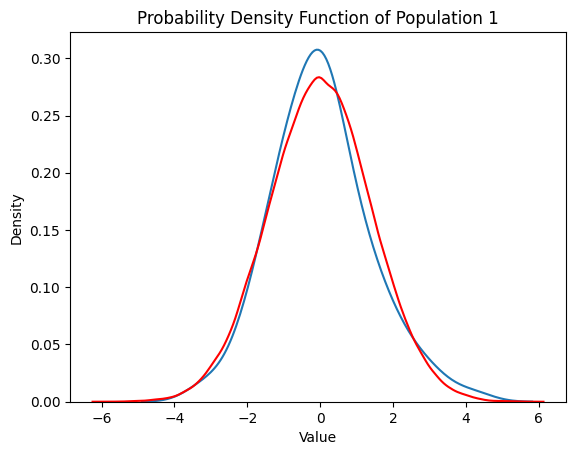

In [37]:
np.random.seed(2609)
sample1_p1=np.random.choice(population_1,size=100,replace=False)
sample1_p2=np.random.choice(population_2,size=100,replace=False)

sample2_p1=np.random.choice(population_1,size=100000,replace=False)
sample2_p2=np.random.choice(population_2,size=100000,replace=False)

difference1=sample1_p1-sample1_p2
difference2=sample2_p1-sample2_p2


#sns.histplot(sample_p1,bins=100,kde=True,stat='density')
sns.kdeplot(difference1, bw_adjust=1)
sns.kdeplot(difference2, bw_adjust=1, color='r')

plt.title("Probability Density Function of Population 1")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [46]:
mil=np.array([1,2,3,4,5,6])
mil

array([1, 2, 3, 4, 5, 6])

In [56]:
np.random.choice([1,2,3,4,5,6],size=[2,3],replace=True)

array([[6, 1, 2],
       [3, 4, 3]])

In [1]:
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


In [5]:
from statsmodels.stats.power import TTestIndPower

# Null effect and expected effect under treatment
null_effect = 0.321
expected_effect = 0.22  # assuming a significant decrease to 0.1

# Calculate the effect size
effect_size = (null_effect - expected_effect) / null_effect

# Parameters for power analysis
alpha = 0.05
power = 0.9

# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)


Sample Size: 213.237


In [3]:
effect_size

0.6884735202492211